### <center> Домашнее задание №2
### <center> Визуальный анализ данных о сердечно-сосудистых заболеваниях.

В соревновании предлагалось определить наличие/отсутствие сердечно-сосудистых заболеваний (ССЗ) по результатам осмотра пациента.

Описание данных.

Датасет сформирован из реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

Объективные признаки:

Возраст (age)
Рост (height)
Вес (weight)
Пол (gender)
Результаты измерения:

Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
Холестерин (cholesterol)
Глюкоза (gluc)
Субъективные признаки (со слов пациентов):

Курение (smoke)
Употребление алкоголя (alco)
Физическая активность (active)
Целевой признак (который интересно будет прогнозировать):

Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)
Возраст дан в днях. Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

---

В рамках задания для простоты будем работать только с обучающей выборкой. Чистить данные от выбросов и ошибок в данных НЕ нужно, кроме тех случаев, где об этом явно указано.

---

In [12]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline



In [13]:
df = pd.read_csv('mlbootcamp5_train.csv', sep=';',
                    index_col='id')

In [14]:
df.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0

### 1. Визуализируем корреляционную матрицу

* Для того чтобы лучше понять признаки в датасете, можно посчитать матрицу коэффициентов корреляции между признаками.

#### Какие два признака больше всего коррелируют (по Пирсону) с признаком `height` ?

- Gluc, Cholesterol
- Weight, Alco
- Smoke, Alco
- Weight, Gender

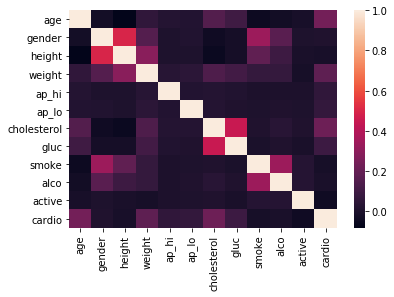

In [15]:
sns.heatmap(df.corr());

Ответ: weight, gender

### 2. Распределение роста для мужчин и женщин
* Как мы увидели, в процессе исследования уникальных значений пол кодируется значениями 1 и 2, расшифровка изначально не была нам дана в описании данных, но мы догадались, кто есть кто, посчитав средние значения роста (или веса) при разных значениях признака gender. Теперь сделаем то же самое, но графически.

#### Постройте violinplot для роста и пола. Используйте: 
- hue – для разбивки по полу
- scale – для оценки количества каждого из полов

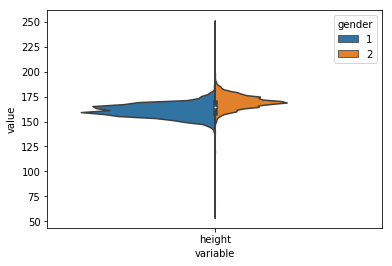

In [37]:
G = pd.melt(frame=df, id_vars=['gender'], value_vars=['height'])
sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender',
    split=True,
    data=G, 
    scale='count'
);

* Постройте на одном графике два отдельных kdeplot роста, отдельно для мужчин и женщин. На нем разница будет более наглядной, но нельзя будет оценить количество мужчин/женщин.

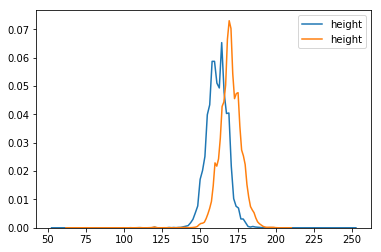

In [38]:
g1 = train[train['gender'] == 1]['height']
g2 = train[train['gender'] == 2]['height']

sns.kdeplot(g1);
sns.kdeplot(g2);

---

### 3. Ранговая корреляция
* В большинстве случаев достаточно воспользоваться линейным коэффициентом корреляции Пирсона для выявления закономерностей в данных, но мы пойдём чуть дальше и используем ранговую корреляцию, которая поможет нам выявить пары, в которых меньший ранг из вариационного ряда одного признака всегда предшествует большему другого (или наоборот, в случае отрицательной корреляции).

Постройте корреляционную матрицу, используя коэффициент Спирмена.
#### 3.1 Какие признаки теперь больше всего коррелируют (по Спирмену) друг с другом?
 * Height, Weight
 * Age, Weight
 * Ap_hi, Ap_lo
 * Cholesterol, Gluc
 * Cardio, Cholesterol
 * Smoke, Alco

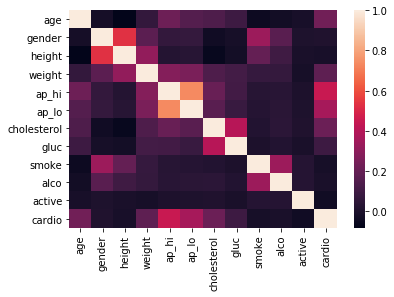

In [39]:
sns.heatmap(train.corr(method='spearman'));

Ответ: Ap_hi, Ap_lo

#### 3.2 Почему мы получили такое большое (относительно) значение ранговой корреляции у этих признаков?

- Неточности в данных (ошибки при сборе данных)
- Связь ошибочна, переменные никак не должны быть связаны друг с другом
- <b>Природа данных</b>

---

### 4. Совместное распределение признаков
* Постройте совместный график распределения jointplot двух наиболее коррелирующих между собой признаков (по Спирмену).

* Кажется, наш график получился неинформативным из-за выбросов в значениях. Постройте тот же график, но с логарифмической шкалой  (чтобы не получать OverflowError необходимо отфильтровать значения меньше либо равные нулю).

C:\Users\XXXXXXX\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\XXXXXXX\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


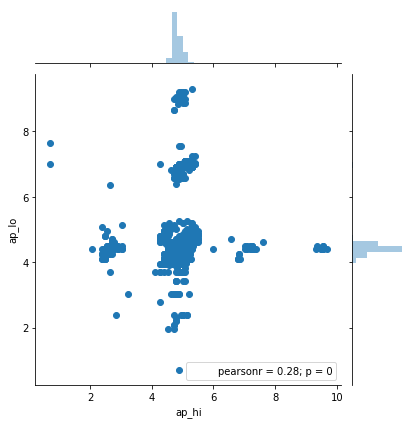

In [40]:
data = df[(df['ap_hi'] > 0) & (df['ap_lo'] > 0)].apply(np.log1p)
g = sns.jointplot(x='ap_hi', y='ap_lo', data=data)

* 4.1 Сколько чётко выраженных кластеров получилось на совместном графике выбранных признаков, с логарифмической шкалой? Под кластером в данной задаче понимается плотное скопление точек, в окрестности которого пренебрежительно мало одиночных наблюдений и которое визуально отделимо от других кластеров.
  * 1
  * 2
  * 3
  * <b>больше трёх</b>

---

### 5. Возраст
* Посчитаем, сколько полных лет было респондентам на момент их занесения в базу.

In [57]:
df['age_years'] = (df['age'] // 365.25).astype(int)
df.head(5)

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  age_years  
id                                   
0      0       1       0         50  
1      0       1       1         55  
2      0       0       1         51  
3      0       1       1         48  
4      0       0       0         47

* Постройте Countplot, где на оси абсцисс будет отмечен возраст, на оси ординат – количество. Каждое значение возраста должно     иметь два столбца, соответствующих количеству человек каждого класса cardio (здоров/болен) данного возраста.

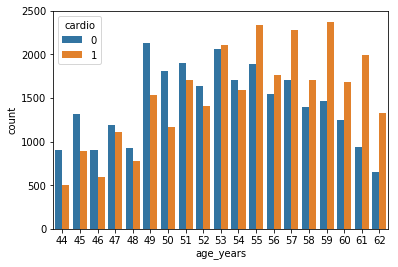

In [62]:
data = df[(df['age_years'] > 43) & (df['age_years'] < 63)]
sns.countplot(x='age_years', hue='cardio', data=data);


#### 5. В каком возрасте количество пациентов с ССЗ  впервые становится больше, чем здоровых?
- 44
- 49
- <b>53</b>
- 62